## Homework 7 (Elchin Gurbanli)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score

#### a.Perform an Exploratory Data Analysis (“EDA”) on the dataset, includingvisualization and descriptive statistics. Interpret the results and describe themin your own words.

In [3]:
df = pd.read_csv("./credit_risk.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.shape

(614, 13)

Our dataframe consists of 12 columns (features) and 614 rows (records). The first column - Loan_ID - will be useless in training phase, so it will be dropped

In [6]:
df.drop("Loan_ID", axis = 1, inplace = True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Replacing "Yes" and "No" records for "1" and "0", respectively to treat Loan_Status as a numerical feature.
P.S. Part of punkt B as target variable encoding

In [7]:
df['Loan_Status'] = df['Loan_Status'].replace(to_replace=['N', 'Y'], value=[0, 1])

In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [9]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [11]:
print(df['Loan_Amount_Term'].value_counts())
print(df['Loan_Amount_Term'].unique())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


In [12]:
df[df.duplicated() == True]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


No duplicated data

In [13]:
df.isnull().values.any()

True

In [14]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


We see that most of the missing values are from Credit_History and Self_Employed

In [15]:
# Unique Value
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Gender': ['Male', 'Female', nan],
 'Married': ['No', 'Yes', nan],
 'Dependents': ['0', '1', '2', '3+', nan],
 'Education': ['Graduate', 'Not Graduate'],
 'Self_Employed': ['No', 'Yes', nan],
 'Property_Area': ['Urban', 'Rural', 'Semiurban']}

In [16]:
pd.crosstab(df['Credit_History'], df['Loan_Status']) 

Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,97,378


In [17]:
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  6
Number of Categorical features:  6


Printing the numerical and categorical features

In [18]:
#Deleting target feature
numerical_feats = np.delete(numerical_feats, -1)
print("Numerical columns: ", np.array(numerical_feats))
print("Categorical columns: ", np.array(categorical_feats))

Numerical columns:  ['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History']
Categorical columns:  ['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'Property_Area']


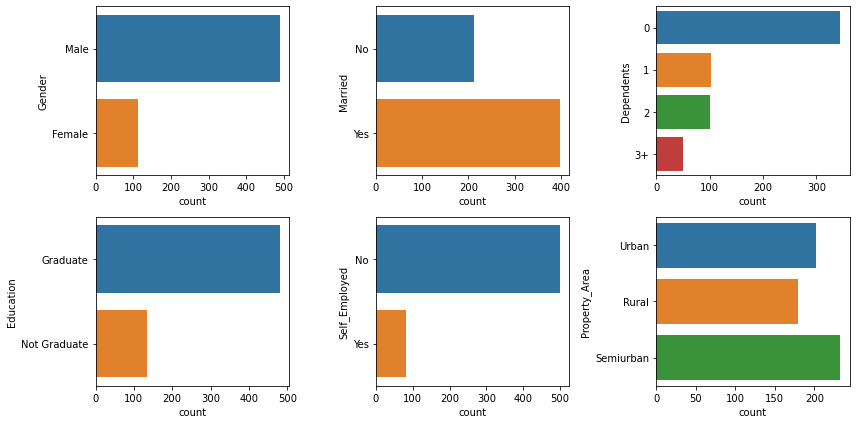

In [19]:
cat_feats = list(categorical_feats)
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols * 4, nr_rows * 3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(cat_feats):
            sns.countplot(y = cat_feats[i], data = df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

Skewness: 2.677552


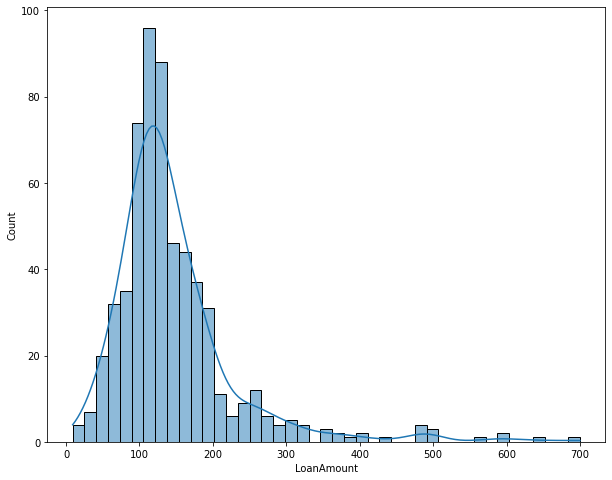

In [20]:
plt.figure(figsize=(10, 8))
# sns.set(rc={'figure.figsize':(15,12)})
sns.histplot(df['LoanAmount'], kde=True)
print("Skewness: %f" % df['LoanAmount'].skew())

Our "Loan Amount" feature is right skewed. Let's normalize it

Skewness: -0.192998


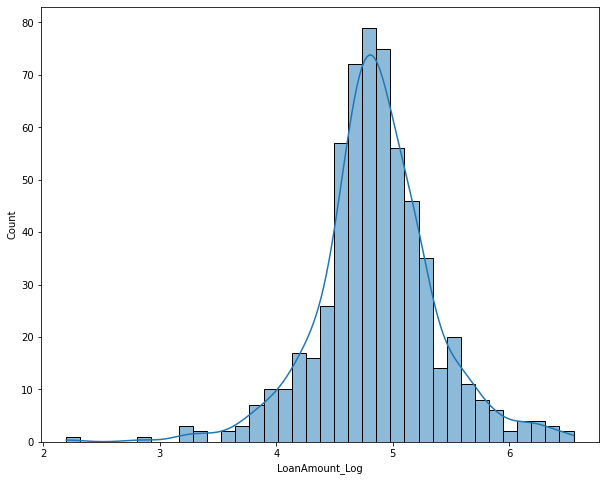

In [21]:
df['LoanAmount_Log'] = np.log(df['LoanAmount'])

plt.figure(figsize=(10, 8))
sns.histplot(df['LoanAmount_Log'], kde = True)
# Skewness
print("Skewness: %f" % df['LoanAmount_Log'].skew())

#### c. Use a “regular” train-test split, with cross-validation for hyperparameterchoice.

Defining X and y variables of our training set

In [22]:
X = df.drop(['Loan_Status', 'LoanAmount_Log'], axis=1)
y = df['Loan_Status']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
448,Male,Yes,2,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural
168,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban
535,Male,No,0,Not Graduate,NaN,2550,2042.0,126.0,360.0,1.0,Rural
146,Female,Yes,2,Graduate,No,14866,0.0,70.0,360.0,1.0,Urban
251,Female,No,2,Graduate,No,3427,0.0,138.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
501,Female,No,0,Graduate,No,3159,0.0,100.0,360.0,1.0,Semiurban
458,Male,No,2,Graduate,No,4354,0.0,136.0,360.0,1.0,Rural
579,Male,No,0,Graduate,NaN,3182,2917.0,161.0,360.0,1.0,Urban
162,Male,Yes,1,Graduate,No,3089,1280.0,121.0,360.0,0.0,Semiurban


In [25]:
#Function for printing the best parameters for the GridSearchCV
def get_best_score(grid):
    print("The best score is {:.2f}".format(grid.best_score_))    
    print("Best parameters", grid.best_params_)
    return grid.best_score_

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

clf_parameters = {
    "preprocessing__num_columns__imputer__strategy": ["mean","median"],
    "model__penalty": ['l1', 'l2'],
    "model__fit_intercept": [True, False],
    "model__tol": [1e-06,5e-06,1e-05,5e-05]
}

clf_model = Pipeline(steps = [
    ("preprocessing", ColumnTransformer(transformers = [
        ("num_columns",Pipeline(steps = [
            ('imputer',SimpleImputer()),
            ('scaler', StandardScaler())
        ]), numerical_feats),
        ("cat_columns", OneHotEncoder(handle_unknown='ignore'), categorical_feats)])),
    ("model", LogisticRegression(solver='liblinear'))
])

In [27]:
clf_model.named_steps.model

LogisticRegression(solver='liblinear')

In [28]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(clf_model, clf_parameters, cv = 5)

In [29]:
logist_reg_model = grid_clf.fit(X_train, y_train)
sc_ridge = get_best_score(grid_clf)
print("Accuracy test score: " + str(accuracy_score(y_test, logist_reg_model.predict(X_test))))

The best score is 0.81
Best parameters {'model__fit_intercept': True, 'model__penalty': 'l1', 'model__tol': 1e-06, 'preprocessing__num_columns__imputer__strategy': 'mean'}
Accuracy test score: 0.7857142857142857


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification report")
print(classification_report(y_test, grid_clf.predict(X_test)))
print("#" * 50)
print("Confusion matrix")
print(confusion_matrix(y_test, grid_clf.predict(X_test)))


Classification report
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        52
           1       0.77      0.97      0.86       102

    accuracy                           0.79       154
   macro avg       0.82      0.70      0.71       154
weighted avg       0.81      0.79      0.76       154

##################################################
Confusion matrix
[[22 30]
 [ 3 99]]


<AxesSubplot:>

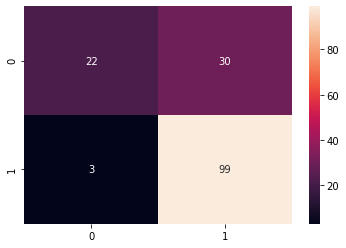

In [31]:
sns.heatmap(confusion_matrix(y_test, grid_clf.predict(X_test)), annot = True)

Naive Bayes

In [32]:
from sklearn.naive_bayes import BernoulliNB

bayes_params = {
    "preprocessing__num_column__imputer__strategy": ["mean","median"],
    "model__alpha": [0.1, 0.3, 0.5, 1, 3, 5]
}

bayes_model = Pipeline(steps = [
    ("preprocessing", ColumnTransformer(transformers = [
        ("num_column", Pipeline(steps = [
            ("imputer", SimpleImputer()),
            ("scaler", StandardScaler()),
        ]), numerical_feats),
        ("cat_column", Pipeline(steps = [
            ("imputer", SimpleImputer(strategy = "most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown = "ignore"))
        ]), categorical_feats),
    ])),
    ("model", BernoulliNB())
])

In [33]:
grid_bayes = GridSearchCV(bayes_model, bayes_params, cv = 5)

In [34]:
nb_model = grid_bayes.fit(X_train, y_train)
sc_ridge = get_best_score(grid_bayes)
accuracy_score(y_test, nb_model.predict(X_test))

The best score is 0.77
Best parameters {'model__alpha': 0.5, 'preprocessing__num_column__imputer__strategy': 'median'}


0.7792207792207793

K-neighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_params = {
    "preprocessing__num_column__imputer__strategy": ["mean","median","most_frequent"],
    "model__n_neighbors": range(1, 100, 3)
}

knn_model = Pipeline(steps = [
    ("preprocessing", ColumnTransformer(transformers = [
        ("num_column", Pipeline(steps = [
            ("imputer", SimpleImputer()),
            ("scaler", StandardScaler()),
        ]), numerical_feats),
        ("cat_column", Pipeline(steps = [
            ("imputer", SimpleImputer(strategy = "most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown = "ignore"))
        ]), categorical_feats),
    ])),
    ("model", KNeighborsClassifier())
])

In [37]:
grid_knn = GridSearchCV(knn_model, knn_params, cv = 5)

In [38]:
grid_knn.fit(X_train, y_train)
sc_ridge = get_best_score(grid_knn)

The best score is 0.82
Best parameters {'model__n_neighbors': 19, 'preprocessing__num_column__imputer__strategy': 'mean'}


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtc_params = {
    "preprocessing__num_column__imputer__strategy": ["mean","median","most_frequent"],
    "model__max_depth": [3, 4, 5, 6, 10, 20]
}
dtc_model = Pipeline(steps = [
    ("preprocessing", ColumnTransformer(transformers = [
        ("num_column",Pipeline(steps = [
            ("imputer",SimpleImputer()),
            ("scaler",StandardScaler()),
        ]), numerical_feats),
        ("cat_column",Pipeline(steps = [
            ("imputer", SimpleImputer(strategy = "most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown = "ignore"))
        ]), categorical_feats),
    ])),
    ("model", DecisionTreeClassifier())
])

In [41]:
grid_dtc = GridSearchCV(dtc_model, dtc_params, cv = 5)

In [42]:
grid_dtc.fit(X_train, y_train)
sc_ridge = get_best_score(grid_dtc)

The best score is 0.80
Best parameters {'model__max_depth': 3, 'preprocessing__num_column__imputer__strategy': 'mean'}


In [44]:
models_dict = [
    clf_model,
    bayes_model,   
    knn_model,
    dtc_model
]

for model in models_dict:
    names = model.named_steps.model
    model_name = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-" * 20)
    print(str(names) + ":" )
    print("Accuracy: {:.3%}".format(accuracy))

--------------------
LogisticRegression(solver='liblinear'):
Accuracy: 78.571%
--------------------
BernoulliNB():
Accuracy: 78.571%
--------------------
KNeighborsClassifier():
Accuracy: 74.026%
--------------------
DecisionTreeClassifier():
Accuracy: 68.831%
